In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pandas_visual_analysis import VisualAnalysis, DataSource

In [2]:
# Configure Matplotlib to display plots inline
%matplotlib inline

In [3]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
missing_values = ["n/a", "na", "--", "NA", "N/A", "NaN"]

data = pd.read_csv("../datasets/fallData.csv", na_values = missing_values)
data = data.dropna()
print(len(data))

# print(data['datetime'][1])
# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%y %H:%M')
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data.set_index('datetime', inplace=True)

# Resample the data to hourly intervals
# Sum 'vid' and average the other features
data_hourly = data.resample('H').agg({
    'vid': 'sum',
    't2m': 'mean',
    'sp': 'mean',
    'spDayBefore': 'mean',
    'tcc': 'mean',
    'tp': 'mean',
    'tHeightAvg': 'mean',
    'uHeightAvg': 'mean',
    'vHeightAvg': 'mean',
    'u10': 'mean',
    'v10': 'mean',
    'u100': 'mean',
    'v100': 'mean',
    'Noorway_sp': 'mean',
    'MeckPom_sp': 'mean',
    'Denmark_sp': 'mean',
    'Sweden_sp': 'mean',
    'Noorway_u10': 'mean',
    'Noorway_v10': 'mean',
    'MeckPom_u10': 'mean',
    'MeckPom_v10': 'mean',
    'Denmark_u10': 'mean',
    'Denmark_v10': 'mean',
    'Sweden_u10': 'mean',
    'Sweden_v10': 'mean'
})
# Reset index to flatten the DataFrame
data_hourly = data_hourly.reset_index()


321380


In [4]:
data_hourly['hour'] = data_hourly['datetime'].dt.hour
data_hourly['day'] = data_hourly['datetime'].dt.day
data_hourly['month'] = data_hourly['datetime'].dt.month
data_hourly['year'] = data_hourly['datetime'].dt.year

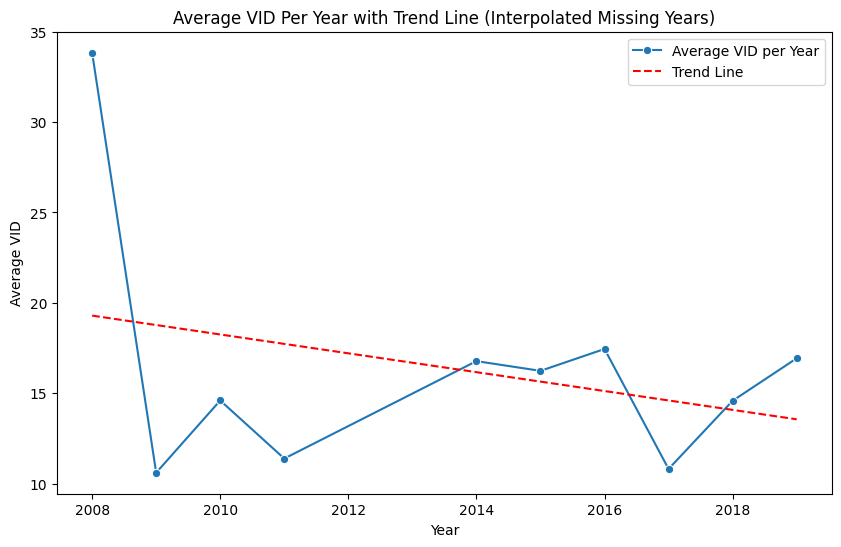

In [5]:

# Create a list of all years
all_years = list(np.arange(data_hourly['year'].min(), data_hourly['year'].max() + 1))
#remove 2012 and 2013
all_years.remove(2012)
all_years.remove(2013)

# print(all_years)

# Calculate the average vid for each year
average_vid_per_year = data_hourly.groupby('year')['vid'].mean()

# Interpolate missing years
average_vid_per_year_interpolated = average_vid_per_year.interpolate()
average_vid_per_year_interpolated = average_vid_per_year_interpolated[average_vid_per_year_interpolated.index.isin(all_years)]
# print(average_vid_per_year_interpolated)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the average VID per year
sns.lineplot(x=all_years, y=average_vid_per_year_interpolated, marker='o', label='Average VID per Year')

# Calculate and plot the trend line
z = np.polyfit(all_years, average_vid_per_year_interpolated, 1)
p = np.poly1d(z)
plt.plot(all_years, p(all_years), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average VID')
plt.title('Average VID Per Year with Trend Line (Interpolated Missing Years)')
plt.legend()

# Save the plot as an image file
plt.savefig('average_vid_per_year_with_trend.png', dpi=300)

# Display the plot
plt.show()


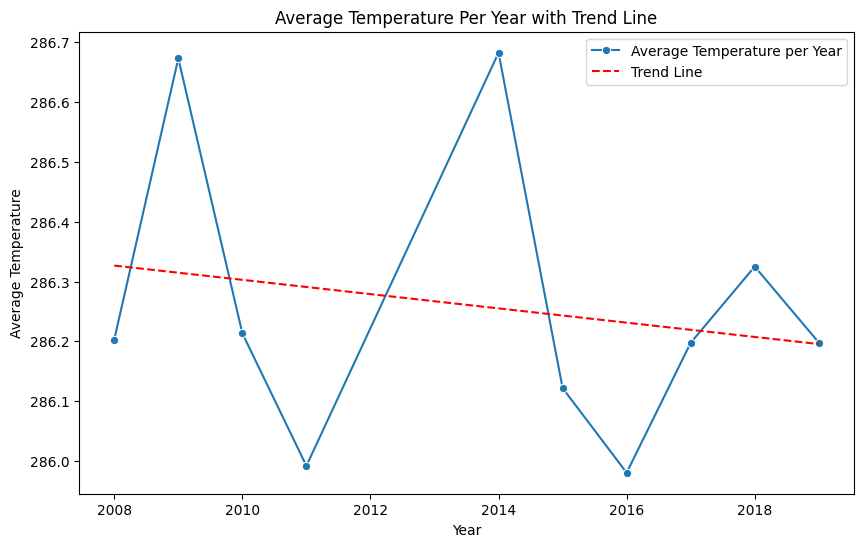

In [6]:
average_vid_per_year = data.groupby('year')['t2m'].mean()

# Interpolate missing years
average_vid_per_year_interpolated = average_vid_per_year.interpolate()
average_vid_per_year_interpolated = average_vid_per_year_interpolated[average_vid_per_year_interpolated.index.isin(all_years)]
# print(average_vid_per_year_interpolated)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the average VID per year
sns.lineplot(x=all_years, y=average_vid_per_year_interpolated, marker='o', label='Average Temperature per Year')

# Calculate and plot the trend line
z = np.polyfit(all_years, average_vid_per_year_interpolated, 1)
p = np.poly1d(z)
plt.plot(all_years, p(all_years), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Per Year with Trend Line')
plt.legend()

# Save the plot as an image file
plt.savefig('average_tmp_per_year_with_trend.png', dpi=300)

# Display the plot
plt.show()

98493
823


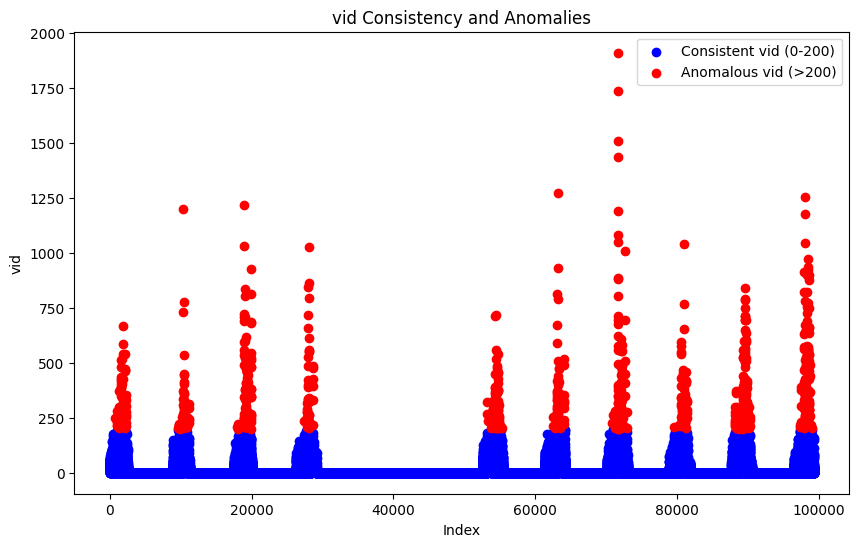

In [8]:
%matplotlib inline

# Step 2: Filter the dataset
consistent_vid = data_hourly[data_hourly['vid'] <= 200]
print(len(consistent_vid))
anomalous_vid = data_hourly[data_hourly['vid'] > 200]
print(len(anomalous_vid))

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Plot consistent vid values
plt.scatter(consistent_vid.index, consistent_vid['vid'], label='Consistent vid (0-200)', color='blue')

# Plot anomalous vid values
plt.scatter(anomalous_vid.index, anomalous_vid['vid'], label='Anomalous vid (>200)', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('vid')
plt.title('vid Consistency and Anomalies')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Group by vid column and visualizein a plot
data.groupby('vid').size().plot(kind='bar')
plt.ylabel('Count')
plt.title('Bird density distribution')
# show th x axis labels every 10th label
plt.xticks(range(0, 100, 10))
plt.show()


In [ ]:
# group by month and visualize against vid
data['month'] = data['datetime'].dt.month
data.groupby('month')['vid'].mean().plot(kind='bar')
plt.ylabel('Bird density (birds/km^2)')
plt.title('Bird density by month')
plt.xticks(range(0,4), ['Aug', 'Sep', 'Oct', 'Nov'])
plt.show()


In [ ]:
# visualize the bird density by month where the bird density is counted as average of each day of that month
data.groupby('month')['vid'].mean().plot(kind='bar')
plt.ylabel('Bird density (birds/km^2)')
plt.title('Bird density by month')
plt.xticks(range(0,4), ['Aug', 'Sep', 'Oct', 'Nov'])
plt.show()


In [85]:
data.head()

,Unnamed: 0,vid,radarId,u100,v100,u10,v10,t2m,sp,spDayBefore,...,Denmark_u10,Denmark_v10,Denmark_sp,Sweden_u10,Sweden_v10,Sweden_sp,wind_rain_acc_t3_4_diff,wind_rain_acc_t3_4,geometry,Unnamed: 39
datetime,,,,,,,,,,,,,,,,,,,,,
2008-08-01 00:00:00,NL.CMB 2008-08-01 00:00:09,9.930190,nldbl,2.830564,5.495176,1.501752,2.425788,294.600449,101085.0015,101075.8731,...,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.5,c(5.17833995819092,52.1016807556152)
2008-08-01 00:05:00,NL.CMB 2008-08-01 00:05:10,7.992978,nldbl,2.949335,5.339153,1.545864,2.370191,294.536352,101087.8903,101075.9046,...,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.5,c(5.17833995819092,52.1016807556152)
2008-08-01 00:10:00,NL.CMB 2008-08-01 00:10:10,4.542623,nldbl,3.067713,5.183647,1.589830,2.314778,294.472469,101090.7696,101075.9360,...,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.5,c(5.17833995819092,52.1016807556152)
2008-08-01 00:15:00,NL.CMB 2008-08-01 00:15:09,1.780841,nldbl,3.185695,5.028660,1.633649,2.259551,294.408798,101093.6393,101075.9673,...,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.5,c(5.17833995819092,52.1016807556152)
2008-08-01 00:20:00,NL.CMB 2008-08-01 00:20:10,2.438683,nldbl,3.304467,4.872637,1.677762,2.203954,294.344702,101096.5281,101075.9988,...,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.5,c(5.17833995819092,52.1016807556152)


In [ ]:
VisualAnalysis(data)

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"

df = pd.read_csv(url)

data = DataSource(df)
VisualAnalysis(data)


In [56]:
# plot bird densit

,datetime,vid,u100,v100,u10,v10,t2m,sp,spDayBefore,tcc,...,Sweden_v10,Sweden_sp,wind_rain_acc_t3_4_diff,wind_rain_acc_t3_4,minute,hour,day,month,year,timestamp
count,323055,323055.000000,323055.000000,323055.000000,323055.000000,323055.000000,323055.000000,323055.000000,323055.000000,3.230550e+05,...,322692.000000,322692.000000,321632.000000,323055.000000,323055.000000,323055.000000,323055.000000,323055.000000,323055.000000,3.230550e+05
mean,2014-09-05 00:28:49.020569344,3.809048,1.629498,2.079440,0.923081,1.263073,286.224568,101484.929106,101482.974351,6.733616e-01,...,0.783748,99495.923258,0.000665,0.537595,27.497606,11.479408,15.516089,9.446125,2013.933172,1.409877e+09
min,2008-08-01 00:00:00,0.000000,-12.156939,-14.015630,-8.316715,-9.447560,267.586576,97561.307550,97561.316270,2.930000e-18,...,-6.386143,95356.902050,-0.249324,0.000326,0.000000,0.000000,1.000000,8.000000,2008.000000,1.217549e+09
25%,2010-10-18 11:02:30,1.000000,-2.085348,-1.125710,-1.322093,-0.681829,282.643392,100970.411700,100976.578150,4.160295e-01,...,-0.684460,98907.052270,-0.097240,0.326526,10.000000,5.000000,8.000000,8.000000,2010.000000,1.287400e+09
50%,2015-08-31 16:10:00,2.000000,2.184053,2.307947,1.120103,1.440152,286.378796,101557.577200,101559.733600,7.835147e-01,...,0.925290,99559.367260,0.012140,0.544801,25.000000,11.000000,15.000000,9.000000,2015.000000,1.441037e+09
75%,2017-10-17 21:42:30,4.000000,5.185093,5.356591,2.938984,3.115276,289.799379,102048.944350,102041.326650,9.868984e-01,...,2.365785,100150.332900,0.094900,0.747972,45.000000,18.000000,23.000000,10.000000,2017.000000,1.508277e+09
max,2019-11-30 22:55:00,99.000000,19.953530,17.866287,12.970286,11.571200,307.097491,103931.594000,103931.594000,1.000000e+00,...,8.084377,102217.317900,0.249918,0.997296,59.000000,23.000000,31.000000,11.000000,2019.000000,1.575154e+09
std,NaN,6.255240,4.796960,4.381939,2.875069,2.658459,5.343301,844.752397,844.530364,3.317198e-01,...,2.252122,943.957467,0.121050,0.266964,17.262987,6.940190,8.803364,1.096881,3.697818,1.169510e+08


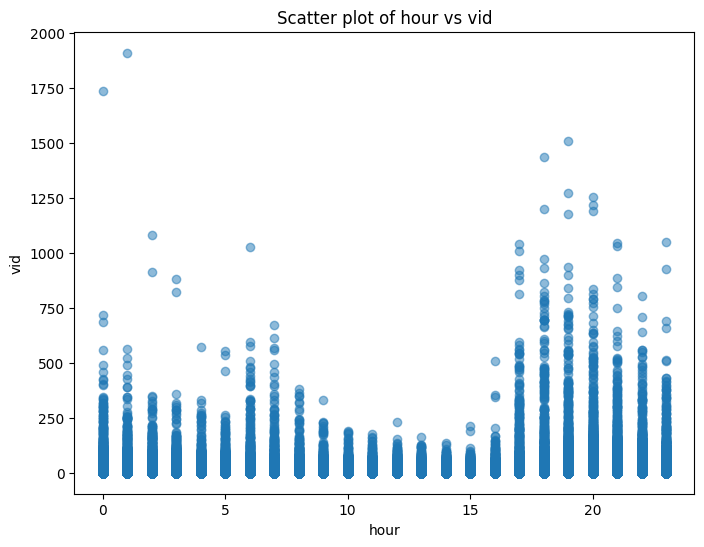

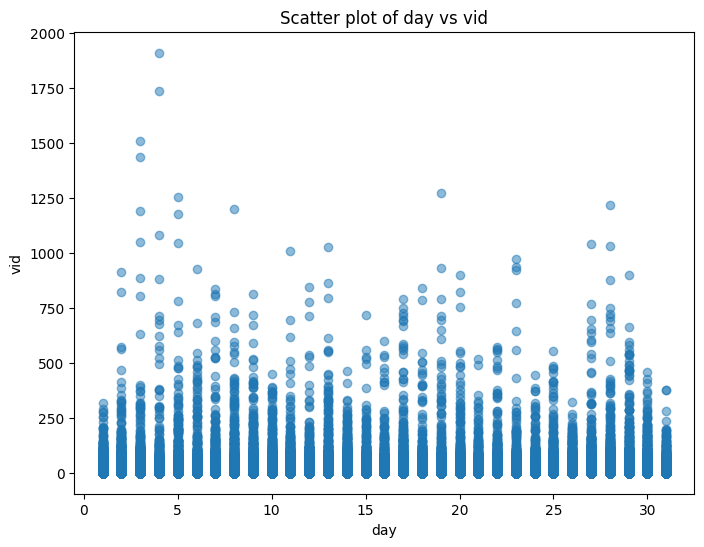

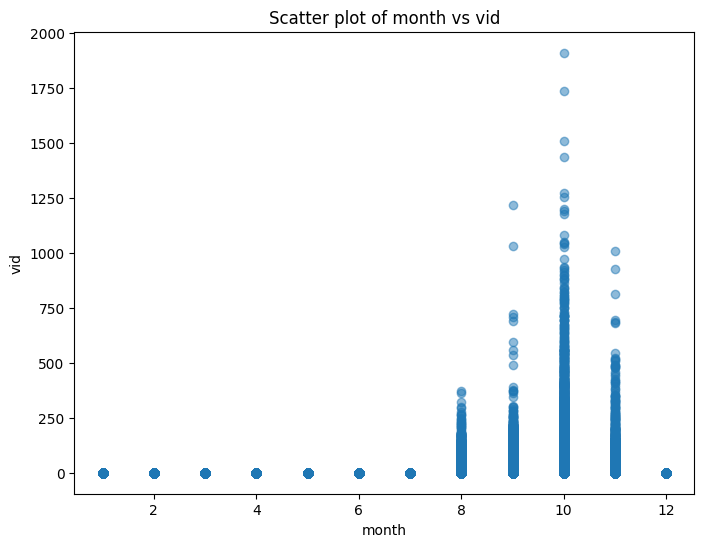

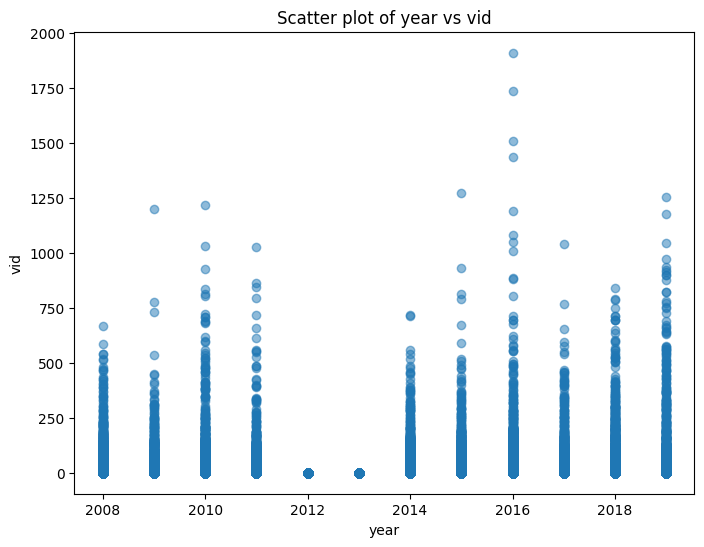

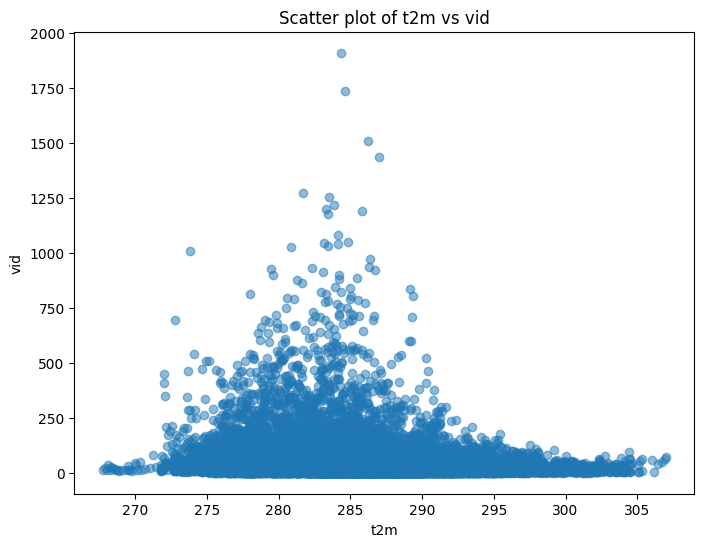

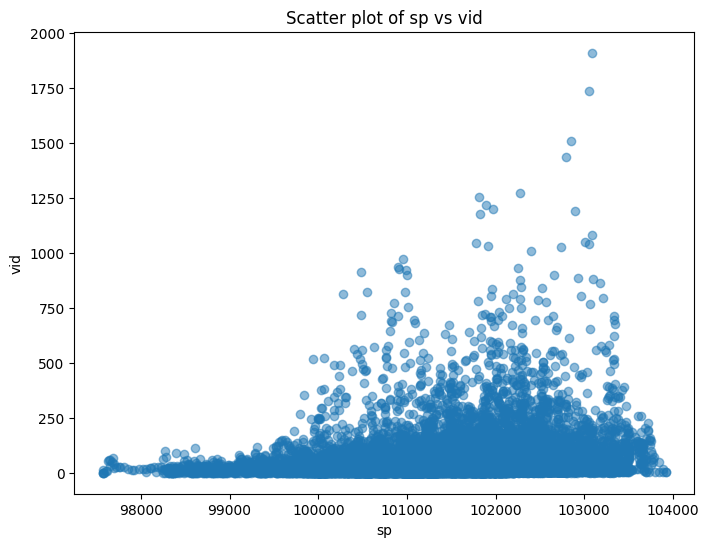

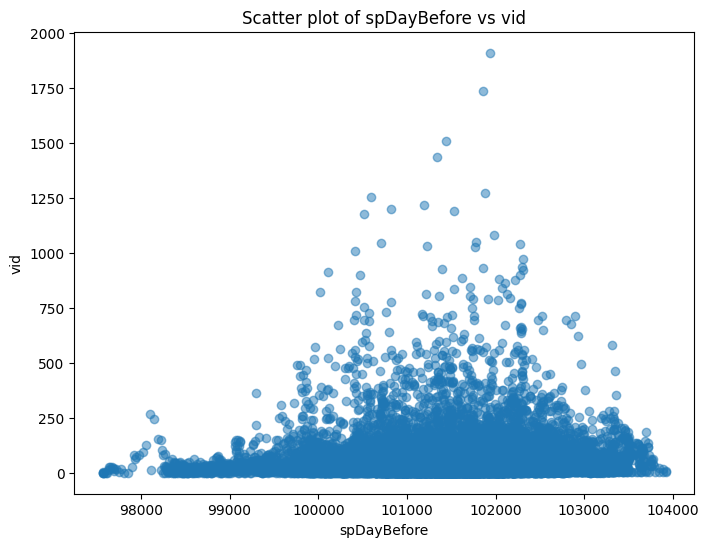

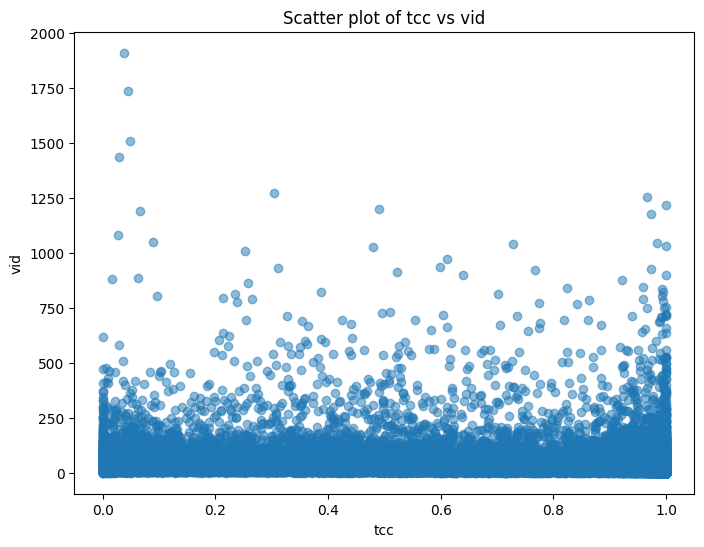

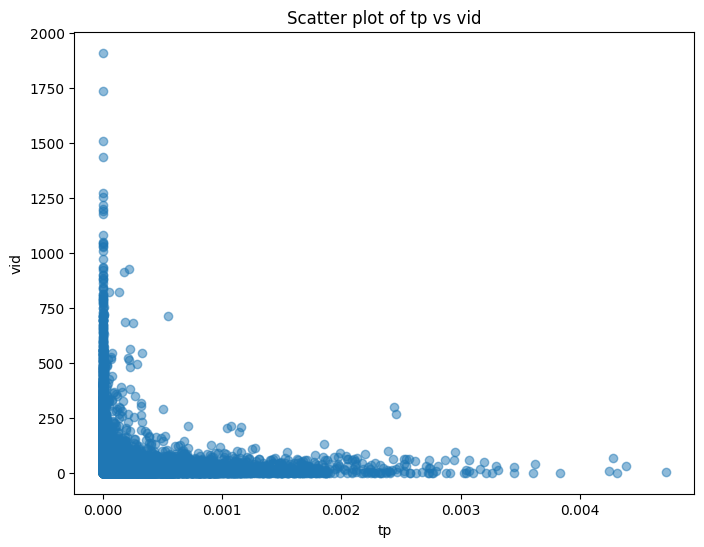

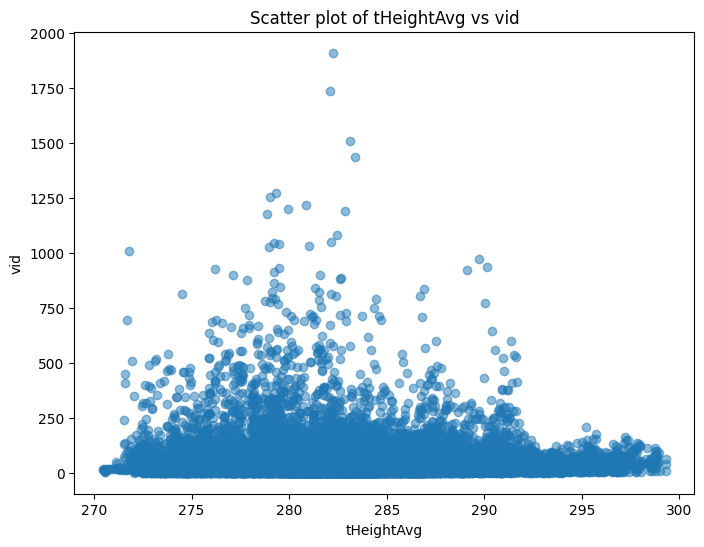

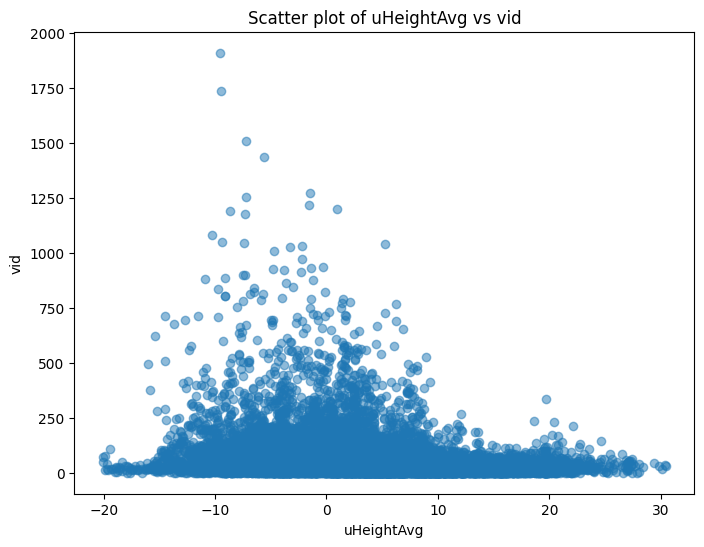

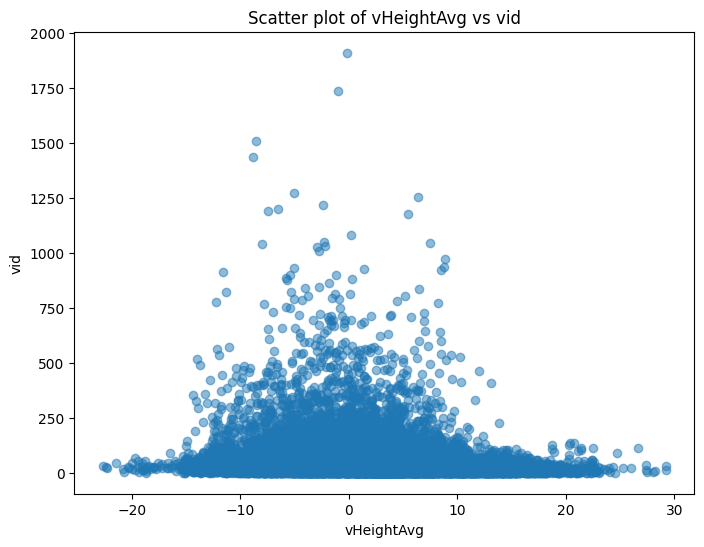

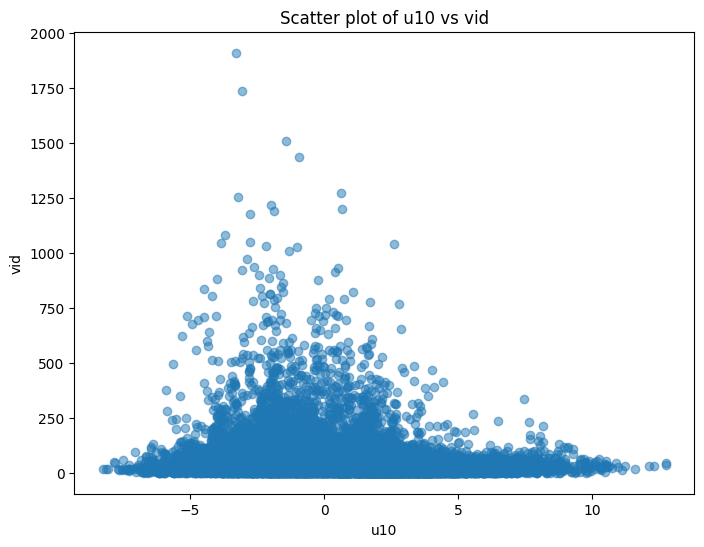

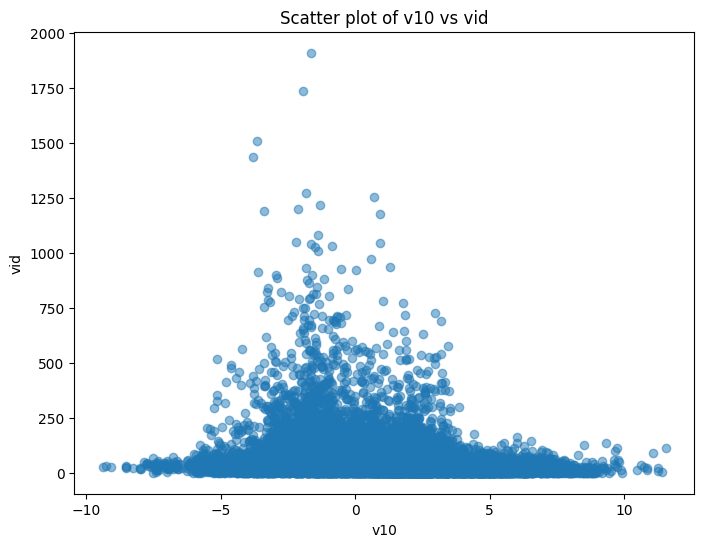

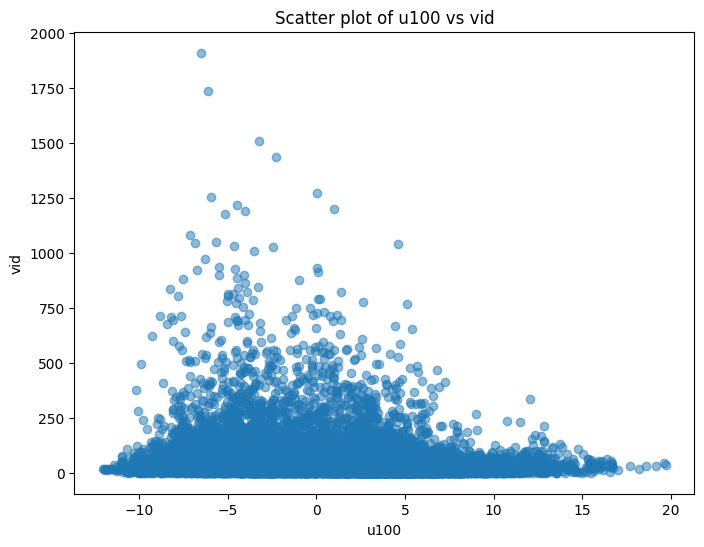

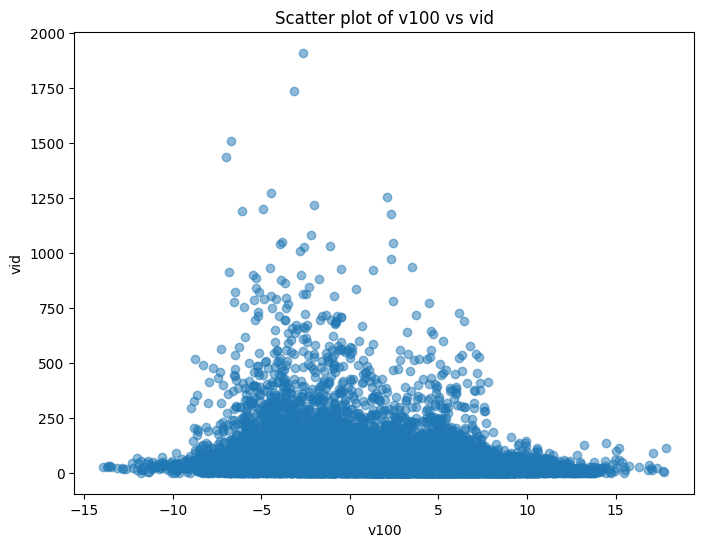

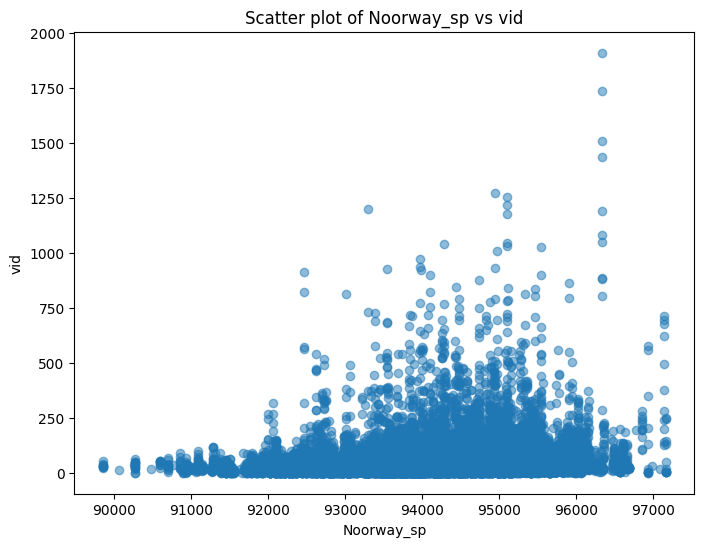

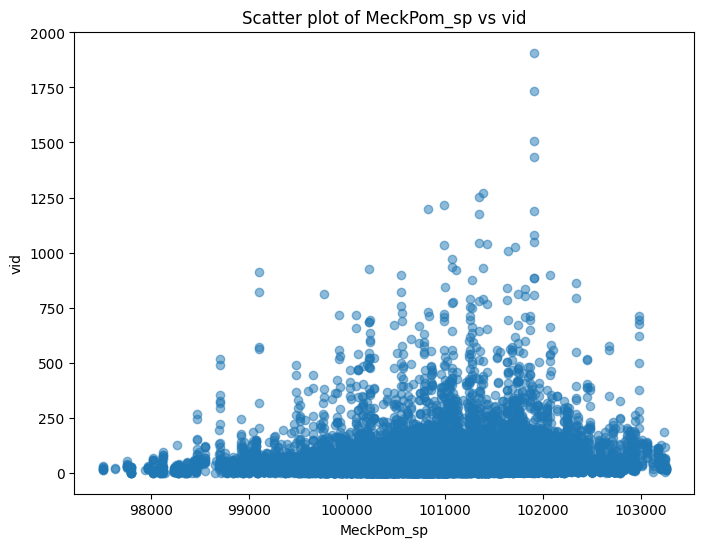

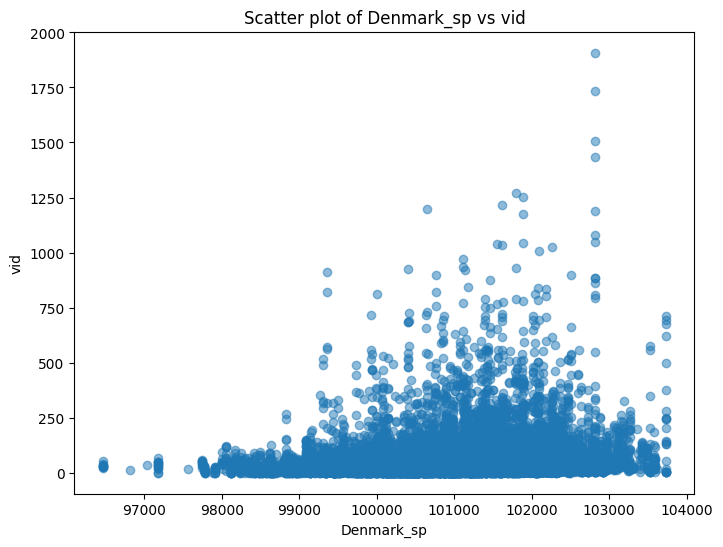

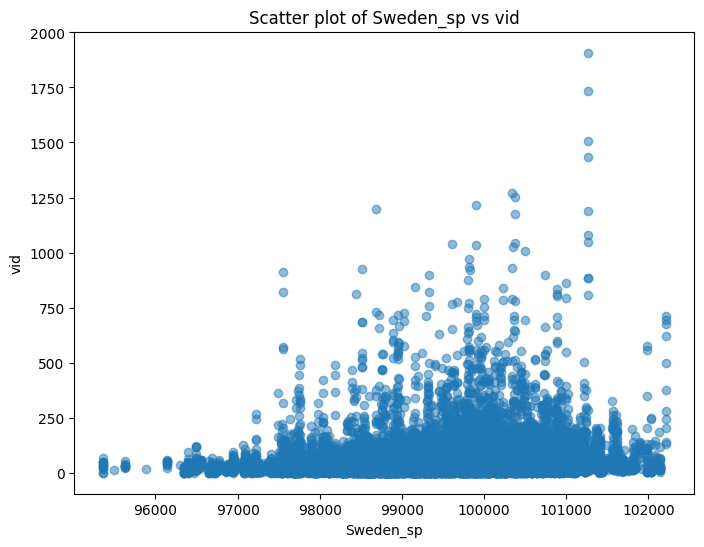

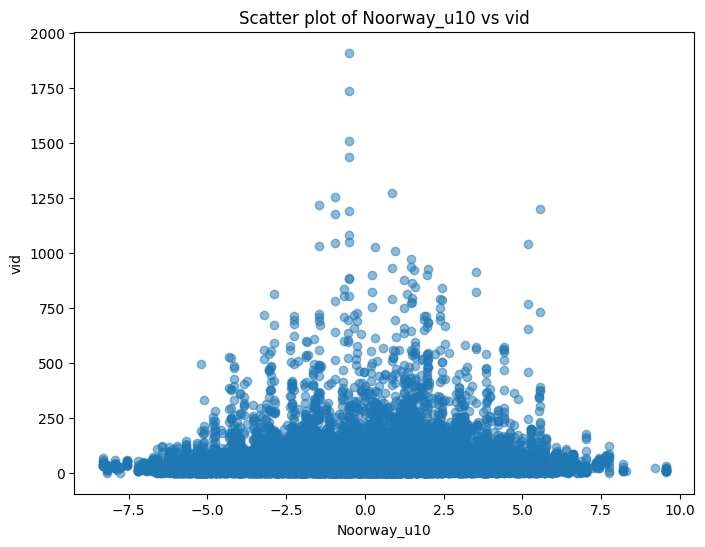

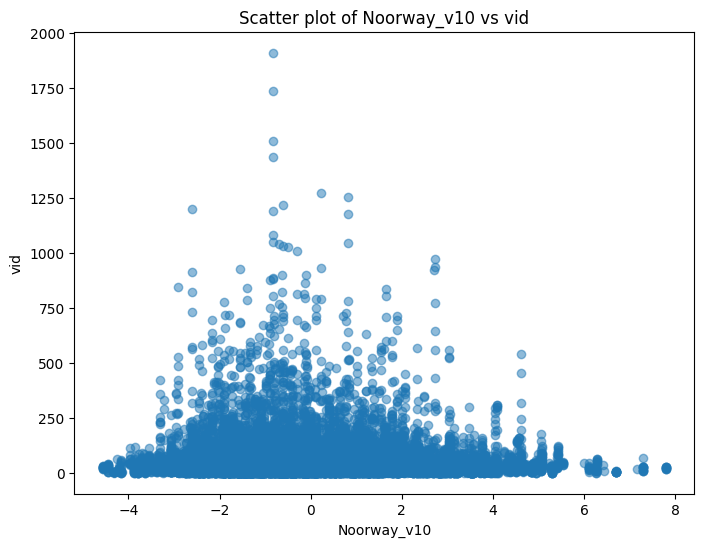

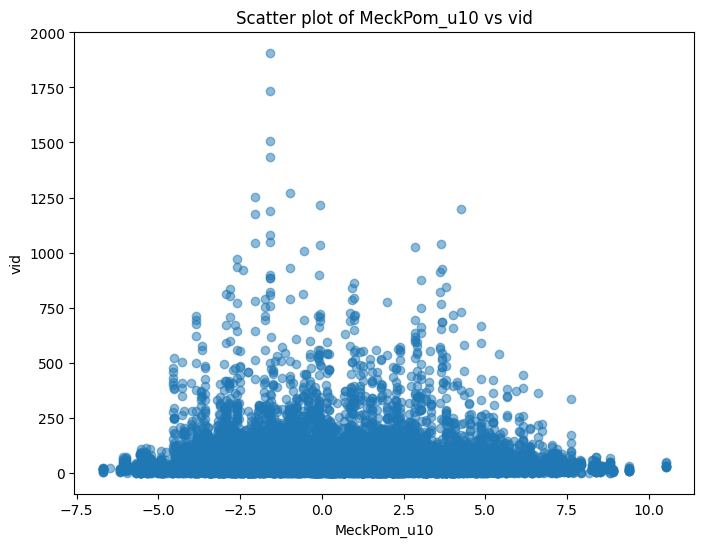

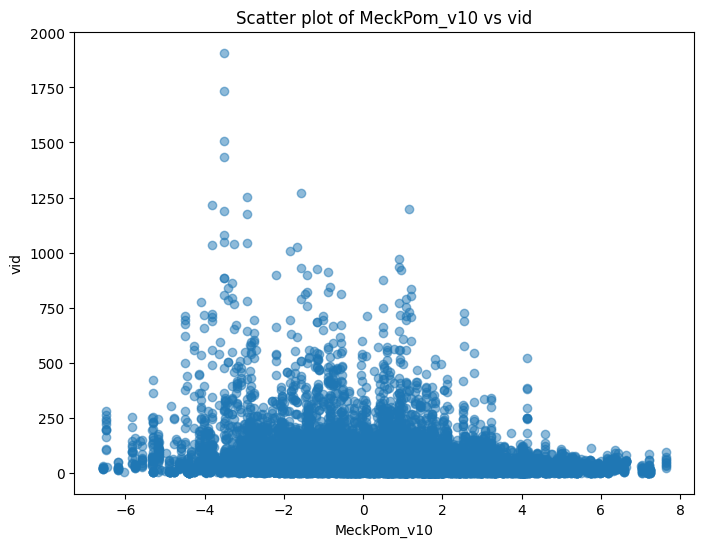

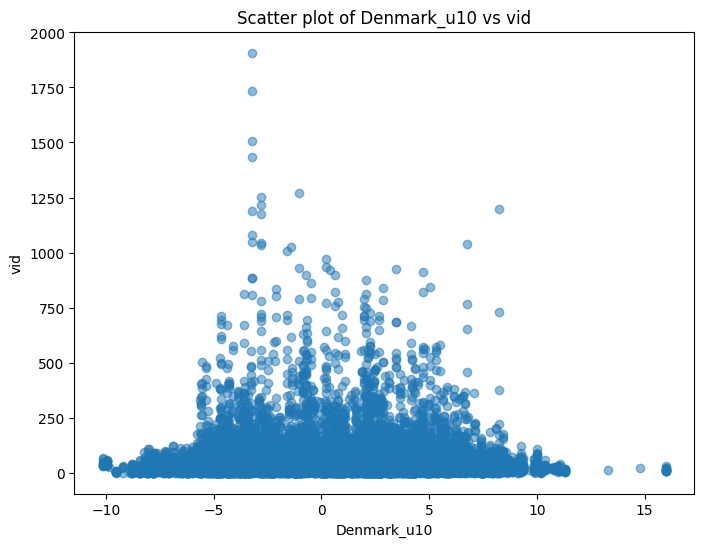

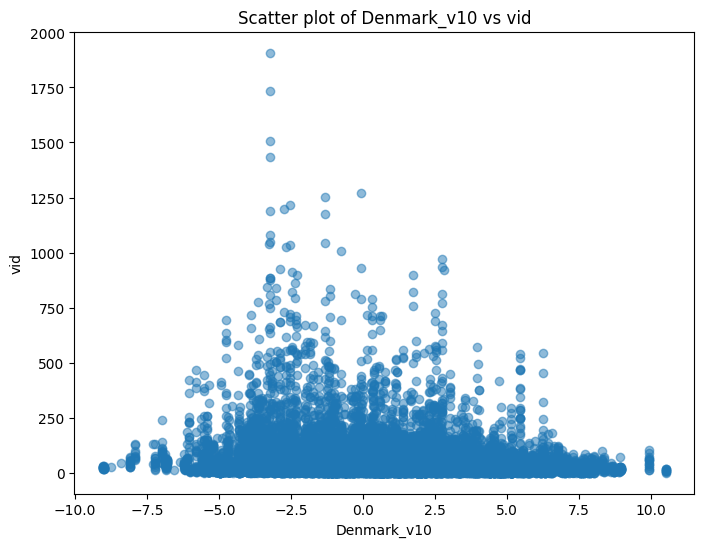

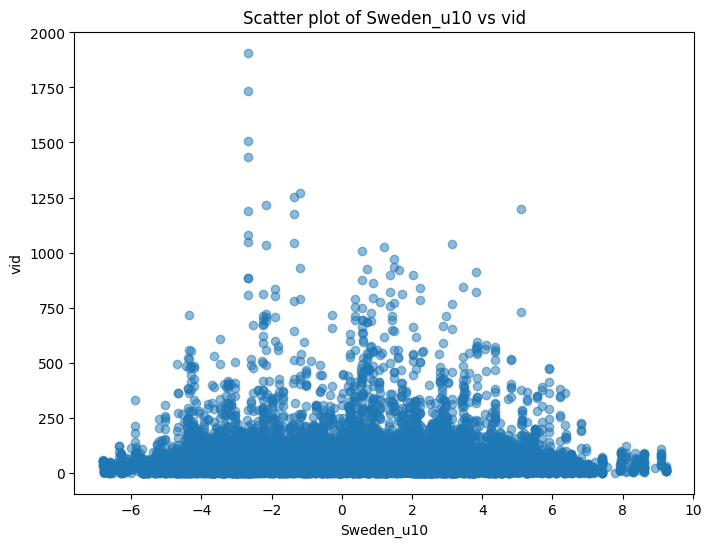

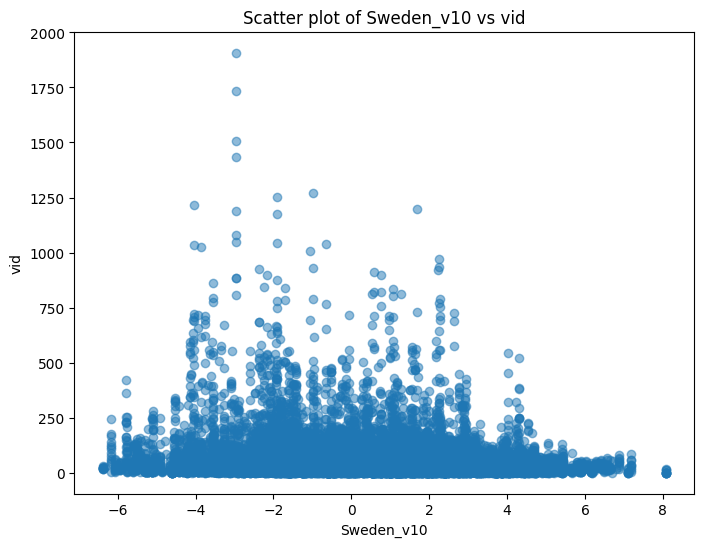

In [107]:
feature_columns = [
    'hour','day','month','year', 't2m', 'sp', 'spDayBefore', 'tcc', 'tp', 
    'tHeightAvg', 'uHeightAvg', 'vHeightAvg', 'u10', 'v10', 'u100', 'v100', 
    'Noorway_sp', 'MeckPom_sp', 'Denmark_sp', 'Sweden_sp', 'Noorway_u10', 
    'Noorway_v10', 'MeckPom_u10', 'MeckPom_v10', 'Denmark_u10', 'Denmark_v10', 
    'Sweden_u10', 'Sweden_v10'
]

# Loop through each feature column and create a scatter plot
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_hourly[feature], data_hourly['vid'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('vid')
    plt.title(f'Scatter plot of {feature} vs vid')
    plt.show()

In [65]:
data['vid'].describe()

count    315128.000000
mean          3.044077
std           3.254477
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          19.000000
Name: vid, dtype: float64

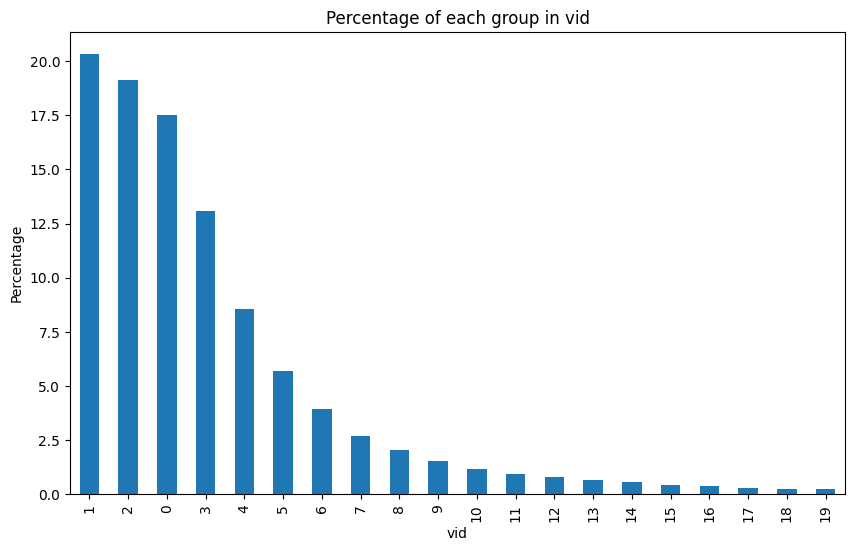

In [66]:
# plot group by data['vid'] and show percentage of each group
grouped_data = data['vid'].value_counts(normalize=True) * 100

# Plot the percentage of each group
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.xlabel('vid')
plt.ylabel('Percentage')
plt.title('Percentage of each group in vid')
plt.show()
